In [68]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
DATA_PATH = "data/"
DATA_PATH

'data/'

In [2]:
import pandas as pd
import numpy as np

# 학습데이터
train_customer = pd.read_csv(f"{DATA_PATH}credit_customer_train.csv") # 고객 개인정보
train_payment = pd.read_csv(f"{DATA_PATH}credit_payment_train.csv") # 고객의 카드값 변제 내역

#테스트데이터
test_customer = pd.read_csv(f"{DATA_PATH}credit_customer_test.csv") # 고객 개인정보
test_payment = pd.read_csv(f"{DATA_PATH}credit_payment_test.csv") # 고객의 카드값 변제 내역

train_customer.shape , train_payment.shape, test_customer.shape , test_payment.shape

((787, 13), (5693, 12), (338, 12), (2557, 12))

In [3]:
train_customer.head()

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,수치4,수치5,신용위험도
0,58996294,7,1,2,11,5,3,1239.5,110000.0,80,60064,1.000000,0
1,54988879,4,3,2,8,-1,5,1223.0,68000.0,112,340014,187.082869,0
2,58984937,5,1,2,15,-1,4,1296.5,130000.0,86,60018,158.113883,0
3,58987530,5,1,2,15,5,3,1304.0,146000.0,90,350008,1.000000,0
4,59003965,4,2,2,8,9,4,0.0,76000.0,113,60091,158.407702,0


In [72]:
train_payment.sort_values("고객ID").head(50)

,고객ID,연체횟수유형1,연체횟수유형2,연체횟수유형3,총연체일수,정상결제횟수,카드코드,카드한도,계정업데이트날짜,카드현재잔액,카드최고잔액,최근지불날짜
5389,54982353,1,2,3,562,13,10,NaN,22/04/2005,0.0,5831.0,07/10/2005
4970,54982353,0,0,0,0,5,10,NaN,12/03/2007,0.0,NaN,NaN
1848,54982353,0,0,0,0,1,10,55000.0,27/08/2014,0.0,2068.0,12/06/2014
4971,54982353,0,0,0,0,12,10,NaN,12/03/2007,120381.6,546657.0,21/05/2011
5540,54982353,0,0,0,0,4,10,NaN,17/09/2003,0.0,4458.0,28/03/2006
5580,54982353,0,0,0,0,35,10,5500.0,05/01/2003,0.0,4043.0,25/11/2003
5059,54982353,0,0,0,0,1,10,NaN,21/11/2006,0.0,NaN,NaN
5534,54982353,0,0,0,0,34,10,NaN,17/10/2003,0.0,5610.0,28/05/2005
2662,54982353,1,0,0,1,31,10,550000.0,03/09/2013,326684.4,609683.0,18/12/2015
5623,54982353,0,0,0,0,11,2,NaN,21/02/2001,0.0,248874.0,22/06/2007


# Feature Engineering
- 머신러닝 모델에 적용, 데이터 분석 등을 위해 데이터에 대한
도메인 지식을 활용하여 특성을 만들어내는 과정


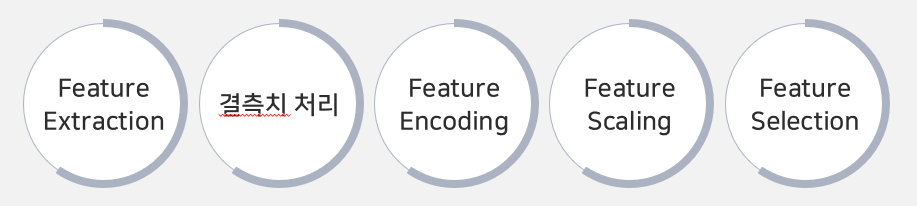

# 특성 추출(Feature Extraction)
- 주어진 데이터에서 머신러닝 모델이 학습 및 예측에서 사용할 특성변수(Features)를 추출하는 과정
- 원본 특성들을 조합하거나 집계 등을 하여 새로운 특성을 생성
- 중요한 Feature끼리 사칙연산 등을 수행해서 새로운 특성을 생성
- 하나의 샘플이 여러 개의 행으로 구성된 데이터일 경우 평균, 표준편차 등으로 집계하여 특성을 생성

## 하나의 샘플이 여러 개의 행으로 구성된 데이터 집계하여 피쳐생성
- 하나의 샘플이 여러 개의 행으로 구성된 데이터일 경우 평균, 표준편차 등으로 집계하여 머신러닝 모델에서 학습 가능한 형태로 특성을 생성

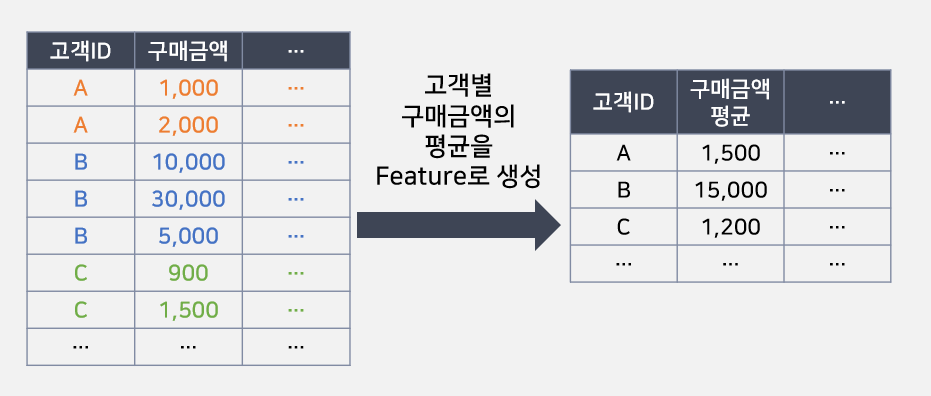

In [73]:
train_payment.groupby("고객ID")["카드한도"].mean().reset_index().rename(columns={"카드한도":"카드한도_mean"})

,고객ID,카드한도_mean
0,54982353,259600.0
1,54982356,330000.0
2,54982387,109450.0
3,54982463,NaN
4,54982530,94600.0
...,...,...
782,59005917,105600.0
783,59005995,35200.0
784,59006193,105160.0
785,59006219,33000.0


In [74]:
agg_dict = {
    # key: 집계대상컬럼명
    "연체횟수유형1": [
        ("연체횟수유형1_sum", "sum"),
        ("변제횟수", "count")
    ],
    "연체횟수유형2": [
        ("연체횟수유형2_sum", "sum"),
    ],
    "연체횟수유형3": [
        ("연체횟수유형3_sum", "sum"),
    ],
    "총연체일수": [
        ("총연체일수_sum", "sum"),
    ],
    "정상결제횟수": [
        ("정상결제횟수_sum", "sum"),
        ("정상결제횟수_mean", "mean"),
        ("정상결제횟수_std", "std"),
    ],
    "카드코드": [
        ("카드코드_nunique", "nunique"),
    ],
    "카드현재잔액": [
        ("카드현재잔액_mean", "mean"),
        ("카드현재잔액_std", "std")
    ],
    "카드최고잔액": [
        ("카드최고잔액_mean", "mean"),
        ("카드최고잔액_std", "std")
    ]
}

tmp = train_payment.groupby("고객ID").agg(agg_dict)
tmp.columns = tmp.columns.droplevel()
tmp = tmp.reset_index()
train_customer = train_customer.merge(tmp, on="고객ID", how="left")
train_customer.head()

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,...,연체횟수유형3_sum,총연체일수_sum,정상결제횟수_sum,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std
0,58996294,7,1,2,11,5,3,1239.5,110000.0,80,...,0,0,26,6.500000,6.454972,2,341837.40,382976.993952,253341.750000,250922.387985
1,54988879,4,3,2,8,-1,5,1223.0,68000.0,112,...,0,0,38,12.666667,6.027714,2,19739.60,22504.881401,36681.666667,14667.393509
2,58984937,5,1,2,15,-1,4,1296.5,130000.0,86,...,0,0,79,15.800000,13.386560,2,29227.68,62191.709155,50258.600000,90255.710081
3,58987530,5,1,2,15,5,3,1304.0,146000.0,90,...,3,630,149,14.900000,15.444884,2,2053.68,4547.761408,37493.888889,23725.174038
4,59003965,4,2,2,8,9,4,0.0,76000.0,113,...,0,0,44,14.666667,11.239810,1,161.20,288.610187,19747.333333,13688.020030


In [75]:
tmp = test_payment.groupby("고객ID").agg(agg_dict)
tmp.columns = tmp.columns.droplevel()
tmp = tmp.reset_index()
test_customer = test_customer.merge(tmp, on="고객ID", how="left")
test_customer.head()

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,...,연체횟수유형3_sum,총연체일수_sum,정상결제횟수_sum,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std
0,58991594,7,3,1,11,5,5,1365.5,152000.0,84,...,0,0,117,16.714286,13.816829,4,237269.485714,388585.126964,250155.428571,391407.849007
1,54983822,5,3,2,15,5,4,0.0,94000.0,113,...,0,1,110,22.000000,7.000000,2,2450.640000,5487.179630,36809.600000,12823.881737
2,54984131,5,3,2,15,5,5,1244.0,57000.0,95,...,0,0,115,19.166667,8.704405,2,39169.000000,30712.634008,48969.666667,11405.139625
3,58994981,7,2,2,11,5,3,0.0,72000.0,109,...,0,0,30,15.000000,5.656854,1,19324.800000,27329.394250,48771.000000,54119.124605
4,59004856,4,2,2,8,5,3,0.0,99000.0,90,...,0,0,33,16.500000,13.435029,1,19231.800000,27369.275073,23714.500000,27969.608730


In [76]:
train_ft = train_customer.drop(columns=["신용위험도"]).copy()
test_ft = test_customer.copy()

train_ft.shape, test_ft.shape

((787, 25), (338, 25))

## 특성들을 파악하여 조합을 통해 새로운 특성을 생성
- 원본 특성들을 파악하여 조합을 통해 새로운 특성을 생성


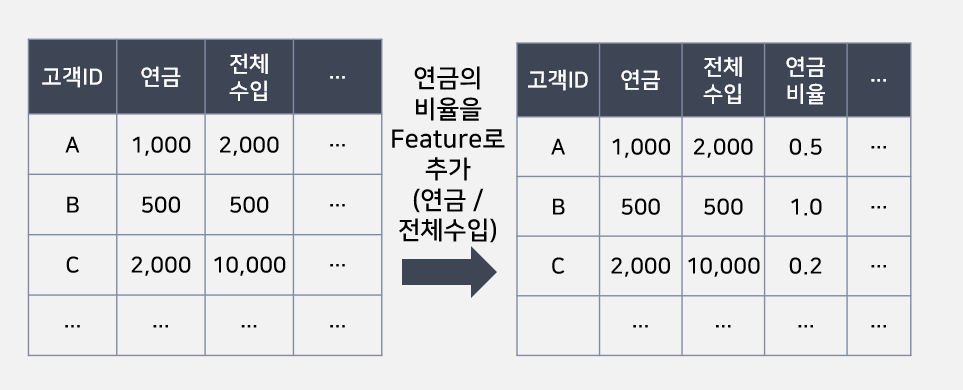

In [77]:
train_ft["div_변제횟수_총연체일수_sum"] = train_ft["변제횟수"] / (train_ft["총연체일수_sum"] + 1e-5)
test_ft["div_변제횟수_총연체일수_sum"] = test_ft["변제횟수"] / (test_ft["총연체일수_sum"] + 1e-5)

In [78]:
target = train_customer["신용위험도"]

In [79]:
train_ft = train_ft.iloc[:,1:] # 특성을 더 추가하지 않을 경우 고객ID 제거
test_ft = test_ft.iloc[:,1:]

train_ft.shape, test_ft.shape

((787, 25), (338, 25))

# 결측치 처리(Handling Missing Values)
- 정형 데이터를 다루다 보면 각 특성별로 비어 있는 값들이
존재하는 경우가 빈번함
- 머신러닝 모델에 특성을 입력할 때는 결측치를 채워서 입력해야 함
- 수치형 데이터 결측치 처리
    - 평균, 중앙값 등
    - 특성 변수의 수치의 의미를 파악하여 새로운 값으로 처리
        - ex) 0으로 처리
- 범주형 데이터 결측치 처리
    - 최빈값
    - 새로운 범주를 생성하여 처리
        - ex) “UNK” 문자열로 처리





In [80]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

,0
정상결제횟수_std,35
카드현재잔액_std,35
카드최고잔액_std,36


In [81]:
mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

,0
정상결제횟수_std,12
카드현재잔액_std,12
카드최고잔액_std,13


## pandas를 이용한 방법

In [82]:
cols = train_ft.isnull().sum()[mask].index
cols

Index(['정상결제횟수_std', '카드현재잔액_std', '카드최고잔액_std'], dtype='object')

In [83]:
train_ft[cols].fillna(0)

,정상결제횟수_std,카드현재잔액_std,카드최고잔액_std
0,6.454972,382976.993952,250922.387985
1,6.027714,22504.881401,14667.393509
2,13.386560,62191.709155,90255.710081
3,15.444884,4547.761408,23725.174038
4,11.239810,288.610187,13688.020030
...,...,...,...
782,13.114877,101873.752743,110592.850324
783,13.582074,47531.921644,35578.302720
784,1.414214,25465.177932,76809.474106
785,7.549834,18271.057559,18617.945814


## sklearn의 impute 모듈을 이용한 방법
- SimpleImputer 클래스 주요 파라미터
    - strategy
        - "mean" : 평균
        - "median" : 중앙값
        - "most_frequent" : 최빈값
        - "constant" : fill_value 파라미터에 지정된 값
    - fill_value
        - 지정한 값으로 채우고 싶을 경우


In [84]:
cols

Index(['정상결제횟수_std', '카드현재잔액_std', '카드최고잔액_std'], dtype='object')

In [85]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputer.fit(train_ft[cols])

SimpleImputer()

In [86]:
imputer.transform(train_ft[cols])

array([[6.45497224e+00, 3.82976994e+05, 2.50922388e+05],
       [6.02771377e+00, 2.25048814e+04, 1.46673935e+04],
       [1.33865604e+01, 6.21917092e+04, 9.02557101e+04],
       ...,
       [1.41421356e+00, 2.54651779e+04, 7.68094741e+04],
       [7.54983444e+00, 1.82710576e+04, 1.86179458e+04],
       [6.36396103e+00, 6.54809164e+03, 5.70140198e+03]])

In [87]:
imputer = SimpleImputer(strategy="median")
imputer.fit(train_ft[["정상결제횟수_std"]])

SimpleImputer(strategy='median')

In [88]:
imputer.transform(train_ft[["정상결제횟수_std"]])

array([[ 6.45497224],
       [ 6.02771377],
       [13.38656042],
       [15.44488409],
       [11.2398102 ],
       [ 7.77817459],
       [11.67618659],
       [15.24109278],
       [ 8.33987838],
       [ 7.        ],
       [10.93106102],
       [ 4.94974747],
       [15.04125905],
       [15.88885004],
       [10.93106102],
       [10.93051648],
       [ 7.85988408],
       [13.99159412],
       [ 8.84590301],
       [ 8.25378701],
       [ 7.09459888],
       [ 5.26307895],
       [ 8.73498712],
       [ 3.55902608],
       [11.82718703],
       [10.28915286],
       [ 7.01243484],
       [13.22875656],
       [17.67766953],
       [15.17399091],
       [ 9.98331942],
       [ 9.68848113],
       [11.56760666],
       [ 3.46410162],
       [13.52930542],
       [ 3.53553391],
       [ 9.07377173],
       [14.78738201],
       [ 4.37035468],
       [12.3568163 ],
       [12.625546  ],
       [11.99166377],
       [ 8.22778394],
       [10.03327796],
       [14.02958184],
       [12

## 머신러닝 모델을 이용하여 결측치 채우기
- 결측치가 아닌 다른 변수들을 이용하여 결측치 추정

In [89]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [90]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
imputer = IterativeImputer(model)
imputer.fit(train_ft)

IterativeImputer(estimator=LinearRegression())

In [91]:
imputer.transform(train_ft)

array([[7.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        2.53341750e+05, 2.50922388e+05, 4.00000000e+05],
       [4.00000000e+00, 3.00000000e+00, 2.00000000e+00, ...,
        3.66816667e+04, 1.46673935e+04, 3.00000000e+05],
       [5.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        5.02586000e+04, 9.02557101e+04, 5.00000000e+05],
       ...,
       [7.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        5.59355000e+04, 7.68094741e+04, 2.00000000e+05],
       [4.00000000e+00, 3.00000000e+00, 2.00000000e+00, ...,
        3.30116667e+04, 1.86179458e+04, 3.00000000e+05],
       [4.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        1.87735000e+04, 5.70140198e+03, 2.00000000e+05]])

In [92]:
train_ft[cols] = train_ft[cols].fillna(0)
test_ft[cols] = test_ft[cols].fillna(0)

In [93]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

# category_encoders
- https://contrib.scikit-learn.org/category_encoders/
- 다양한 방식으로 범주형 피처를 숫자로 인코딩해주는 라이브러리

```bash
pip install category_encoders
```

In [94]:
%pip install category_encoders

In [95]:
import category_encoders as ce

cols = [col for col in train_ft.columns if col.startswith("범주")]
train_ft[cols] = train_ft[cols].astype(str)
test_ft[cols] = test_ft[cols].astype(str)

## OneHotEncoder

In [96]:
# handle_missing='value' 는 사이킷런의 ignore 옵션과 동일
# return_df = True 기본값, 데이터프레임 반환
enc = ce.one_hot.OneHotEncoder()
tmp = enc.fit_transform(train_ft[cols])
pd.concat([train_ft, tmp], axis=1)

,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,수치4,...,범주5_6,범주5_7,범주5_8,범주5_9,범주5_10,범주6_1,범주6_2,범주6_3,범주6_4,범주6_5
0,7,1,2,11,5,3,1239.5,110000.0,80,60064,...,0,0,0,0,0,1,0,0,0,0
1,4,3,2,8,-1,5,1223.0,68000.0,112,340014,...,0,0,0,0,0,0,1,0,0,0
2,5,1,2,15,-1,4,1296.5,130000.0,86,60018,...,0,0,0,0,0,0,0,1,0,0
3,5,1,2,15,5,3,1304.0,146000.0,90,350008,...,0,0,0,0,0,1,0,0,0,0
4,4,2,2,8,9,4,0.0,76000.0,113,60091,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,7,1,2,11,5,3,1323.5,122000.0,86,151300,...,0,0,0,0,0,1,0,0,0,0
783,7,2,2,11,5,4,0.0,50000.0,113,450080,...,0,0,0,0,0,0,0,1,0,0
784,7,1,2,11,9,5,1328.0,189000.0,85,60019,...,0,0,0,0,0,0,1,0,0,0
785,4,3,2,8,9,4,1250.0,95000.0,111,60047,...,0,0,0,0,0,0,0,1,0,0


## CountEncoder

In [97]:
enc = ce.count.CountEncoder()
enc.fit_transform(train_ft[cols])

,범주1,범주2,범주3,범주4,범주5,범주6
0,340,218,728,331,475,192
1,258,472,728,257,116,367
2,181,218,728,180,116,223
3,181,218,728,180,475,192
4,258,97,728,257,155,223
...,...,...,...,...,...,...
782,340,218,728,331,475,192
783,340,97,728,331,475,223
784,340,218,728,331,155,367
785,258,472,728,257,155,223


## BinaryEncoder
- 1부터 시작하는 정수로 범주값을 인코딩하고, 정수를 이진수로 변경해서 각 자리수를 피처로 변환

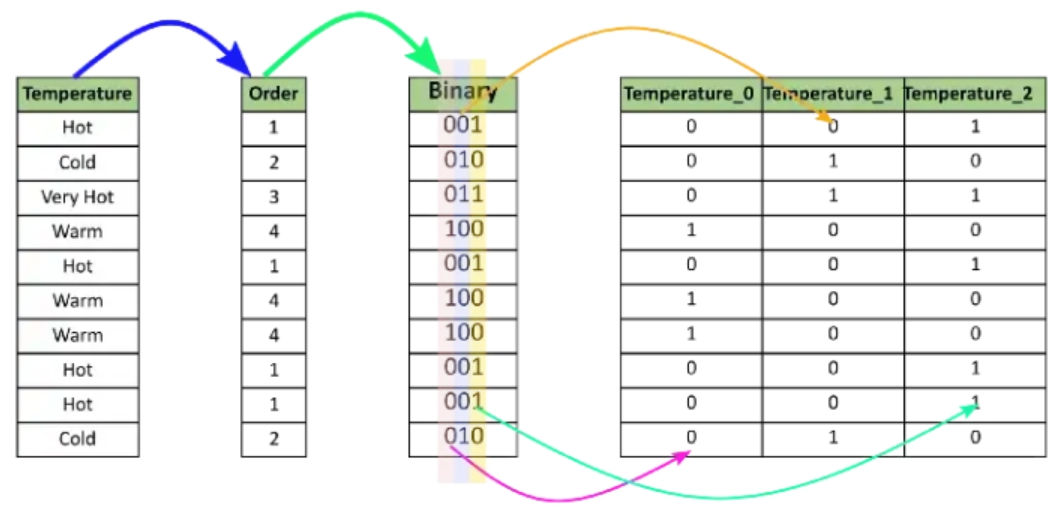

In [98]:
enc = ce.binary.BinaryEncoder()
enc.fit_transform(train_ft[cols])

,범주1_0,범주1_1,범주1_2,범주2_0,범주2_1,범주3_0,범주3_1,범주4_0,범주4_1,범주4_2,범주4_3,범주5_0,범주5_1,범주5_2,범주5_3,범주6_0,범주6_1,범주6_2
0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,1
3,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1
4,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
783,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,1
784,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0
785,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,1


# 피처들을 조합해서 새로운 범주형 피처를 만들기

- itertools
    - 효율적인 반복을 위한 이터레이터를 만드는 모듈
- itertools 에서 combinations 함수
    - 첫 번째 인수로 반복가능한 객체
    - 두 번째 인수로 정수 전달
        - 첫 번째 인수로 전달된 객체에서 n 개의 가능한 모든 조합을 튜플로 반환

In [99]:
cols

['범주1', '범주2', '범주3', '범주4', '범주5', '범주6']

In [100]:
from itertools import combinations

for col in combinations(cols, 2):
    train_ft["_".join(col)] = train_ft[col[0]] + "_" + train_ft[col[1]]
    test_ft["_".join(col)] = test_ft[col[0]] + "_" + test_ft[col[1]]

In [101]:
train_ft.head()

,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,수치4,...,범주2_범주3,범주2_범주4,범주2_범주5,범주2_범주6,범주3_범주4,범주3_범주5,범주3_범주6,범주4_범주5,범주4_범주6,범주5_범주6
0,7,1,2,11,5,3,1239.5,110000.0,80,60064,...,1_2,1_11,1_5,1_3,2_11,2_5,2_3,11_5,11_3,5_3
1,4,3,2,8,-1,5,1223.0,68000.0,112,340014,...,3_2,3_8,3_-1,3_5,2_8,2_-1,2_5,8_-1,8_5,-1_5
2,5,1,2,15,-1,4,1296.5,130000.0,86,60018,...,1_2,1_15,1_-1,1_4,2_15,2_-1,2_4,15_-1,15_4,-1_4
3,5,1,2,15,5,3,1304.0,146000.0,90,350008,...,1_2,1_15,1_5,1_3,2_15,2_5,2_3,15_5,15_3,5_3
4,4,2,2,8,9,4,0.0,76000.0,113,60091,...,2_2,2_8,2_9,2_4,2_8,2_9,2_4,8_9,8_4,9_4


In [102]:
for col in combinations(cols, 3):
    print(col)

('범주1', '범주2', '범주3')
('범주1', '범주2', '범주4')
('범주1', '범주2', '범주5')
('범주1', '범주2', '범주6')
('범주1', '범주3', '범주4')
('범주1', '범주3', '범주5')
('범주1', '범주3', '범주6')
('범주1', '범주4', '범주5')
('범주1', '범주4', '범주6')
('범주1', '범주5', '범주6')
('범주2', '범주3', '범주4')
('범주2', '범주3', '범주5')
('범주2', '범주3', '범주6')
('범주2', '범주4', '범주5')
('범주2', '범주4', '범주6')
('범주2', '범주5', '범주6')
('범주3', '범주4', '범주5')
('범주3', '범주4', '범주6')
('범주3', '범주5', '범주6')
('범주4', '범주5', '범주6')


# 특성 인코딩(Feature Encoding)
- 머신러닝 모델은 수치형 데이터를 입력 받아야 한다
- 범주형 변수를 수치형 데이터로 변환해주는 방법을 인코딩이라고 한다
- 각 범주형 변수의 특징을 파악하여 적절한 인코딩 방식을 선택한다

## Ordinal encoding
- 범주형 변수가 순서형인 경우에 적합한 방식으로 순서에 맞게 정수를 연속적으로 부여해서 인코딩 하는 방식​

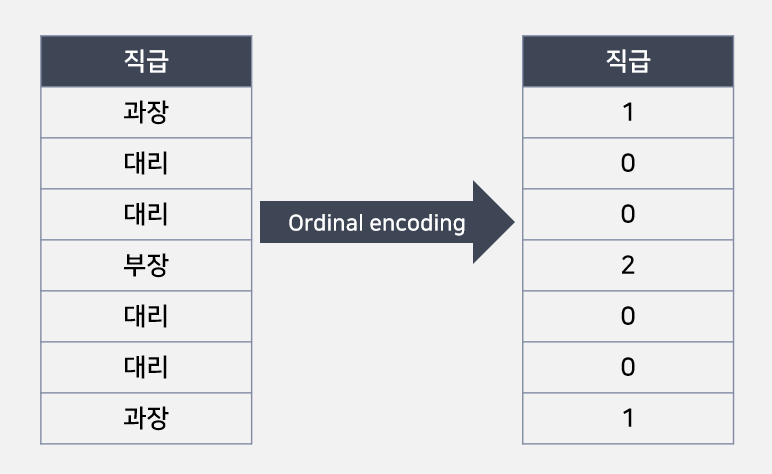

In [103]:
# 임의 순서형 피처
map_dict = {
    "1": "사원",
    "2": "대리",
    "3": "과장",
    "4": "차장",
    "5": "부장"
}
tmp = train_ft["범주6"].map(map_dict)
df = pd.DataFrame(tmp).rename(columns={"범주6":"직급"})
df

,직급
0,과장
1,부장
2,차장
3,과장
4,차장
...,...
782,과장
783,차장
784,부장
785,차장


In [104]:
df["직급"].unique()

array(['과장', '부장', '차장', '사원', '대리'], dtype=object)

In [105]:
ord_dict = {
    "사원": 0,
    "대리": 1,
    "과장": 2,
    "차장": 3,
    "부장": 4
}

df["직급"].map(ord_dict)

,직급
0,2
1,4
2,3
3,2
4,3
...,...
782,2
783,3
784,4
785,3


## Count encoding
- 범주형 변수의 각 고유값의 빈도수를 부여해서 인코딩 하는 방식
- 범주형 변수가 명목형인 경우 고유값의 개수가 많을 때 사용

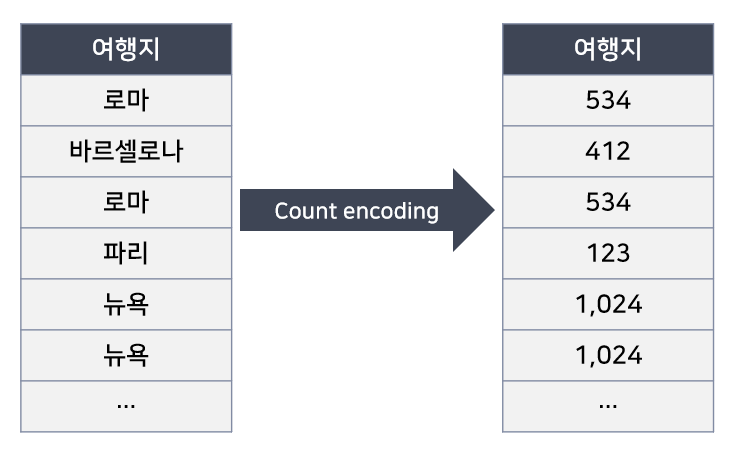

In [106]:
cnt_dict = df["직급"].value_counts().to_dict()
cnt_dict

{'부장': 367, '차장': 223, '과장': 192, '사원': 4, '대리': 1}

In [107]:
df["직급"].map(cnt_dict)

,직급
0,192
1,367
2,223
3,192
4,223
...,...
782,192
783,223
784,367
785,223


## Label encoding
- 범주형 변수의 n개 고유값들을 0에서 n-1값으로 숫자를 부여해서 인코딩 하는 방식
- 피처 인코딩으로 사용하기에는 부적합

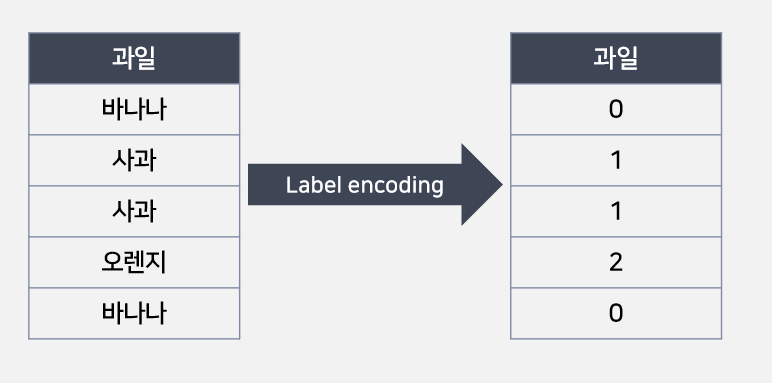

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["직급"] = le.fit_transform(df["직급"])
df["직급"]

,직급
0,0
1,2
2,4
3,0
4,4
...,...
782,0
783,4
784,2
785,4


In [109]:
le.classes_

array(['과장', '대리', '부장', '사원', '차장'], dtype=object)

- 복원하기

In [110]:
le.inverse_transform(df["직급"])

array(['과장', '부장', '차장', '과장', '차장', '차장', '차장', '부장', '과장', '과장', '부장',
       '부장', '부장', '과장', '과장', '차장', '차장', '부장', '차장', '부장', '차장', '과장',
       '부장', '부장', '과장', '부장', '차장', '부장', '차장', '부장', '부장', '부장', '부장',
       '과장', '부장', '부장', '과장', '차장', '차장', '부장', '부장', '부장', '부장', '부장',
       '부장', '부장', '차장', '부장', '부장', '부장', '부장', '과장', '부장', '부장', '부장',
       '차장', '과장', '차장', '차장', '차장', '과장', '차장', '부장', '부장', '부장', '과장',
       '과장', '부장', '부장', '부장', '부장', '과장', '부장', '부장', '차장', '과장', '부장',
       '부장', '부장', '과장', '부장', '과장', '부장', '부장', '차장', '차장', '차장', '부장',
       '과장', '차장', '과장', '부장', '차장', '부장', '차장', '부장', '과장', '과장', '과장',
       '부장', '과장', '과장', '차장', '부장', '과장', '과장', '부장', '부장', '과장', '부장',
       '차장', '과장', '과장', '차장', '차장', '부장', '과장', '과장', '과장', '차장', '과장',
       '부장', '부장', '과장', '과장', '과장', '과장', '과장', '차장', '차장', '부장', '부장',
       '차장', '차장', '차장', '차장', '과장', '부장', '부장', '과장', '부장', '차장', '부장',
       '부장', '차장', '부장', '차장', '과장', '부장', '부장', '차

## One-hot encoding
- 범주형 변수의 고유값의 개수만큼 열을 가진 데이터를 만들어 해당 범주의 인덱스에 1을 부여하고 아닌 인덱스 열에는 모두 0을 부여해서 인코딩하는 방식
- 고유값의 개수가 많으면 Feature의 차원이 많아짐
- 대부분의 값이 0인 희소(Sparse)한 데이터를 생성함



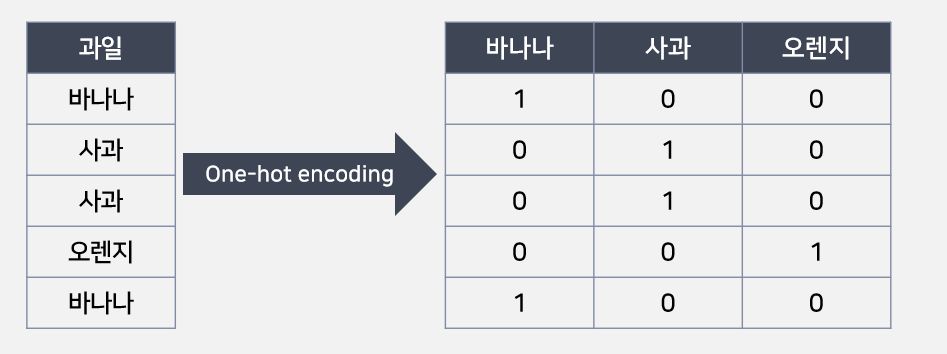

In [111]:
cols = train_ft.columns[:6]
cols

Index(['범주1', '범주2', '범주3', '범주4', '범주5', '범주6'], dtype='object')

In [112]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(train_ft[cols])

OneHotEncoder(handle_unknown='ignore')

In [113]:
train_ft[enc.get_feature_names_out()] = enc.transform(train_ft[cols]).toarray()
test_ft[enc.get_feature_names_out()] = enc.transform(test_ft[cols]).toarray()

- 인코딩 완료 후 기존 범주형 컬럼 제거

In [114]:
train_ft.drop(columns=cols, inplace=True)
test_ft.drop(columns=cols, inplace=True)

train_ft.shape, test_ft.shape

((787, 70), (338, 70))

# 특성 스케일링(Feature Scaling)
- 각 Feature들의 크기의 범위를 맞춰서 변환하는 방법
- 대부분의 머신러닝 모델들은 Feature의 scale에 매우 민감하기 때문에 scale을 조정하는 작업이 필요

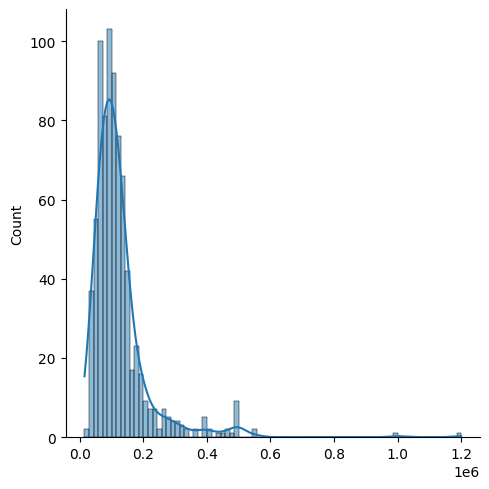

In [124]:
import matplotlib.pylab as plt
import seaborn as sns

arr = train_ft["수치2"].to_numpy()
sns.displot(arr, kde=True)
plt.show()

## StandardScaler 클래스(Standardization)
- 각 Feature별로 평균과 표준편차를 이용하여 평균을 0, 분산이 1인 데이터로 Scaling
$$
\frac{x-\bar{x}}{σ}
$$

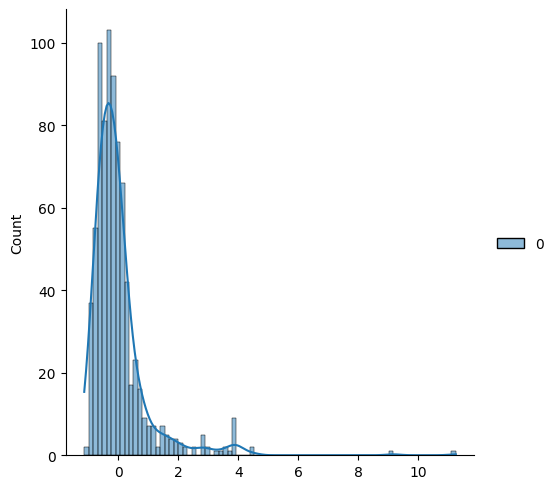

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tmp = scaler.fit_transform(arr.reshape(-1,1))
sns.displot(tmp, kde=True)
plt.show()

In [129]:
scaler.inverse_transform(tmp)

array([[ 110000.],
       [  68000.],
       [ 130000.],
       [ 146000.],
       [  76000.],
       [  63000.],
       [  61000.],
       [  63000.],
       [  67000.],
       [  94000.],
       [  75000.],
       [  69000.],
       [ 162000.],
       [ 132000.],
       [ 107000.],
       [ 102000.],
       [  67000.],
       [ 183000.],
       [ 121000.],
       [ 164000.],
       [  95000.],
       [  60000.],
       [ 296000.],
       [  95000.],
       [ 120000.],
       [ 201000.],
       [  67000.],
       [ 167000.],
       [ 124000.],
       [ 133000.],
       [ 119000.],
       [  65000.],
       [ 121000.],
       [  56000.],
       [ 182000.],
       [  89000.],
       [ 124000.],
       [  88000.],
       [  98000.],
       [  97000.],
       [  87000.],
       [  65000.],
       [  50000.],
       [  96000.],
       [ 183000.],
       [ 147000.],
       [  84000.],
       [ 128000.],
       [ 500000.],
       [  44000.],
       [  86000.],
       [ 106000.],
       [  76

## MinMaxScaler 클래스
- 각 Feature별로 최소값과 최대값을 이용하여 최소값은 0, 최대값은 1인 데이터로 Scaling
$$
\frac{x-Min(X)}{Max(X)-Min(X)}
$$

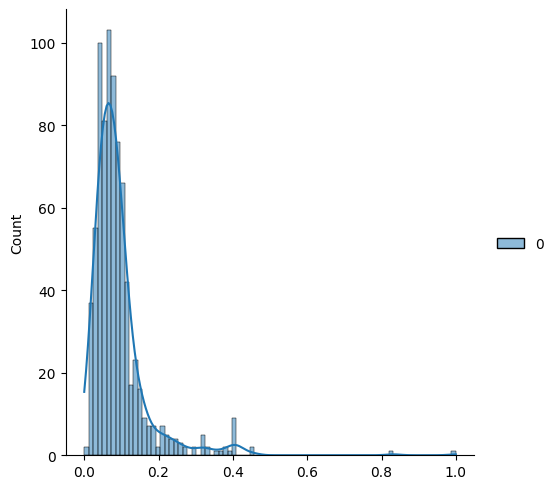

In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tmp = scaler.fit_transform(arr.reshape(-1,1))
sns.displot(tmp, kde=True)
plt.show()

## PowerTransformer 클래스
- 로그함수와 거듭제곱 변환을 적용하여 데이터를 정규분포와 유사하게 변환

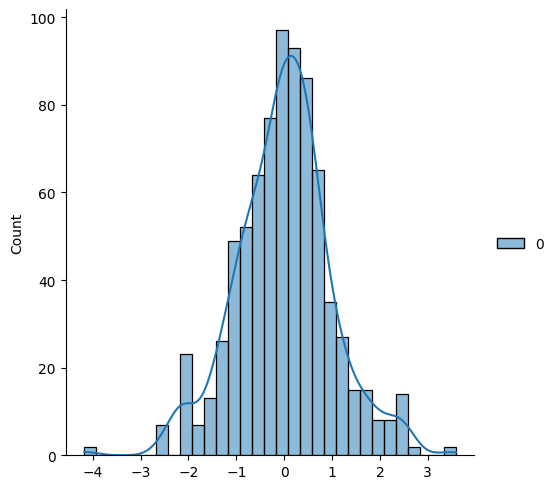

In [131]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
tmp = scaler.fit_transform(arr.reshape(-1,1))
sns.displot(tmp, kde=True)
plt.show()

## RobustScaler 클래스
- 평균과 표준편차 대신에 중앙값과 사분위수 범위(IQR)를 이용하여 Scaling

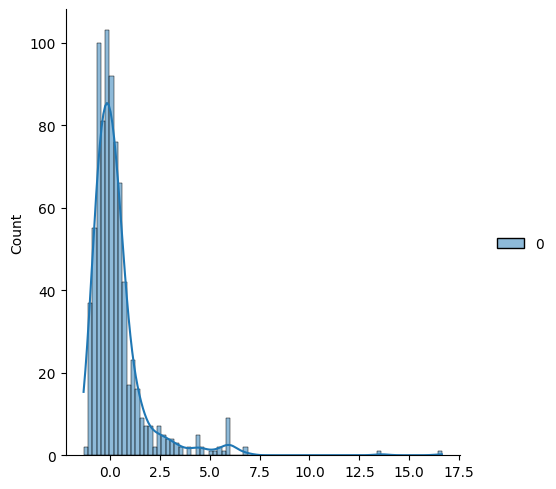

In [132]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
tmp = scaler.fit_transform(arr.reshape(-1,1))
sns.displot(tmp, kde=True)
plt.show()

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(5, shuffle=True, random_state=42)
model = LogisticRegression(random_state=42)

In [134]:
scaler_cls_list = [StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler]

In [141]:
StandardScaler.__name__

'StandardScaler'

In [144]:
def check_scaling_score(scaler_cls_list, x, y, model, cv, scoring):
    for scaler_cls in scaler_cls_list:
        scaler = scaler_cls()
        x_train = scaler.fit_transform(x)
        scores = cross_val_score(model, x_train, y, scoring=scoring, cv=cv, n_jobs=-1)
        print(scaler_cls.__name__, scores.mean())

In [159]:
cols = train_ft.select_dtypes(include=['object']).columns
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

In [160]:
check_scaling_score(scaler_cls_list, train_ft, target, model, cv, "roc_auc")

StandardScaler 0.6716829877112136
MinMaxScaler 0.6388904889912954
PowerTransformer 0.6813156041986688
RobustScaler 0.6769473246287763


In [161]:
scaler = PowerTransformer()
scaler.fit(train_ft)

PowerTransformer()

In [162]:
train_ft[train_ft.columns] = scaler.transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)

# 특성 선택(Feature Selection)
- 전체 Features 를 사용하지 않고 중요한 Feature 들을 선택해서 학습
- Feature 를 생성하는 과정에서 많은 Features 가 생성되면 과적합이 발생 가능성이 높아져 성능하락의 원인이 됨
- 유용한 Feature 를 선별하는 과정이 필요함

## SelectFromModel 클래스
- 모델의 Features 중요도 또는 가중치를 기반으로 Features 를 선택하는 방법

- 모델의 Features 중요도 선택해보기

In [164]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42) # 특성 선택을 위한 모델
model = LogisticRegression(random_state=42) # 학습용 모델

- 모델의 가중치 기반으로 선택해보기

In [165]:
# from sklearn.ensemble import RandomForestClassifier

# lr = LogisticRegression(random_state=42) # 특성 선택을 위한 모델
# model = RandomForestClassifier(random_state=42) # 학습용 모델

In [169]:
from sklearn.feature_selection import SelectFromModel

fs = SelectFromModel(rf) # 특성 선택에 사용하기 위한 모델 객체 전달, 주로 가벼운 모델 전달
x_train = fs.fit_transform(train_ft, target) # 특성 선택이 완료된 입력 데이터가 ndarray 로 반환
print(x_train.shape)

scores = cross_val_score(model, x_train, target, cv=cv, scoring="roc_auc", n_jobs=-1)
scores.mean()

(787, 17)


0.7080997183819765

- 선택된 피처 확인하기

In [170]:
best_cols = fs.get_feature_names_out()
best_cols

array(['수치1', '수치2', '수치3', '수치4', '수치5', '연체횟수유형1_sum', '변제횟수',
       '총연체일수_sum', '정상결제횟수_sum', '정상결제횟수_mean', '정상결제횟수_std',
       '카드코드_nunique', '카드현재잔액_mean', '카드현재잔액_std', '카드최고잔액_mean',
       '카드최고잔액_std', 'div_변제횟수_총연체일수_sum'], dtype=object)

In [171]:
train_ft[best_cols]

,수치1,수치2,수치3,수치4,수치5,연체횟수유형1_sum,변제횟수,총연체일수_sum,정상결제횟수_sum,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std,div_변제횟수_총연체일수_sum
0,0.298864,0.153326,-1.552637,-0.924955,-1.276408,-0.716723,-0.420283,-0.727843,-1.050349,-1.364309,-0.756230,-0.324192,1.357270,1.291356,1.253745,0.872046,0.733612
1,0.262249,-0.747206,1.067144,1.385980,0.689357,-0.716723,-0.797667,-0.727843,-0.683726,-0.177882,-0.848605,-0.324192,-0.266522,-0.268980,-0.740765,-0.673383,0.648086
2,0.425313,0.447329,-1.282423,-0.927096,0.560694,-0.716723,-0.121712,-0.727843,0.075160,0.328391,0.778984,-0.324192,-0.175737,0.208207,-0.349811,0.223597,0.801903
3,0.441947,0.646180,-1.057881,1.400262,-1.276408,0.876874,0.810990,1.572920,0.788222,0.187740,1.245005,-0.324192,-0.512733,-0.873868,-0.712613,-0.463532,-1.310397
4,-2.479912,-0.531579,1.209638,-0.923700,0.562079,-0.716723,-0.797667,-0.727843,-0.537147,0.150687,0.297285,-1.428081,-0.575125,-1.603377,-1.600976,-0.702084,0.648086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,0.485190,0.336649,-1.282423,0.764401,-1.276408,0.876874,-0.121712,1.529666,0.019045,0.203544,0.717764,0.423805,0.031162,0.470666,0.450548,0.343219,-1.310609
783,-2.479912,-1.367587,1.209638,1.508419,0.604359,0.876874,0.937663,1.088653,1.023860,0.442306,0.823083,1.430753,-0.107397,0.074058,-0.223431,-0.272179,-1.287940
784,0.495168,1.072996,-1.332706,-0.927049,-1.276408,-0.716723,-1.304356,-0.727843,-0.737092,0.658405,-1.817963,-1.428081,-0.284731,-0.215184,-0.223510,0.131676,0.532196
785,0.322161,-0.112491,0.929404,-0.925746,-1.276408,-0.716723,-0.797667,-0.727843,-0.583956,0.043411,-0.518075,-0.324192,-0.372151,-0.357236,-0.878353,-0.571563,0.648086


## SelectKBest, SelectPercentile 클래스
- 각 Feature 와 Target 사이에 유의한 통계적 관계가 있는지 계산하여 Features 를 선택하는 방법
- SelectKBest
    - k개의 가장 유의한 통계적 관계가 있는 피쳐를 선택
- SelectPercentile
    - 백분위수에 따라 가장 유의한 통계적 관계가 있는 피쳐를 선택

In [183]:
from sklearn.feature_selection import SelectKBest, SelectPercentile

sk = SelectKBest(k=10) # 상위 피처 10개 선택
x = sk.fit_transform(train_ft, target)
print(x.shape)

scores = cross_val_score(model, x, target, cv=cv, scoring="roc_auc", n_jobs=-1)
scores.mean()

(787, 10)


0.7144041218637993

In [184]:
sp = SelectPercentile(percentile=20) # 상위 20% 피처 선택
x = sp.fit_transform(train_ft, target)
print(x.shape)

scores = cross_val_score(model, x, target, cv=cv, scoring="roc_auc", n_jobs=-1)
scores.mean()

(787, 11)


0.7185531874039939

In [185]:
sp.get_feature_names_out()

array(['수치2', '연체횟수유형1_sum', '변제횟수', '총연체일수_sum', '정상결제횟수_sum',
       '정상결제횟수_mean', '정상결제횟수_std', '카드현재잔액_mean', '카드최고잔액_mean',
       'div_변제횟수_총연체일수_sum', '범주2_1'], dtype=object)

```
반복문을 통해서 SelectPercentile 의 percentile 별로 cv 점수(auc)를 확인해서 최적의 percentile 값 찾기
cross_val_score 함수에 전달되는 객체는 로지스틱 회귀 사용
```

In [194]:
# from xgboost import XGBClassifier
from tqdm.notebook import tqdm

# model = XGBClassifier(random_state=42)
model = LogisticRegression(random_state=42)
scores = []

for percentile in tqdm(range(1, 101)):
    sp = SelectPercentile(percentile=percentile)
    x = sp.fit_transform(train_ft, target)
    score = cross_val_score(model, x, target, cv=cv, scoring="roc_auc", n_jobs=-1).mean()
    scores.append([percentile, score])

scores = np.array(scores)
idx = np.argmax(scores[:,1])
best_score = scores[idx]

  0%|          | 0/100 [00:00<?, ?it/s]

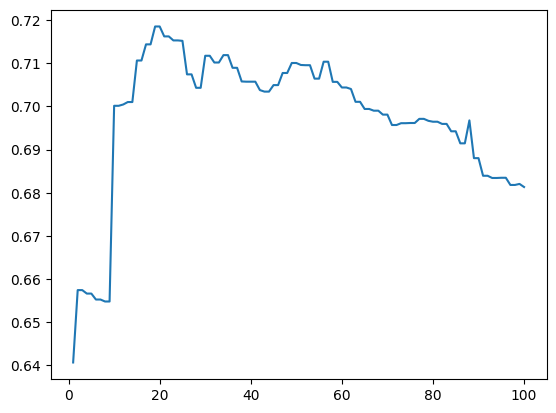

In [195]:
plt.plot(scores[:,0], scores[:, 1])
plt.show()

In [200]:
sp = SelectPercentile(percentile=best_score[0])
sp.fit(train_ft, target) # 중요 피처들 선택
best_cols = sp.get_feature_names_out()
best_cols

array(['수치2', '연체횟수유형1_sum', '변제횟수', '총연체일수_sum', '정상결제횟수_sum',
       '정상결제횟수_mean', '정상결제횟수_std', '카드현재잔액_mean', '카드최고잔액_mean',
       'div_변제횟수_총연체일수_sum', '범주2_1'], dtype=object)

In [201]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=42)
model.fit(train_ft[best_cols], target)

pred = model.predict_proba(test_ft[best_cols])[:,1]

[LightGBM] [Info] Number of positive: 157, number of negative: 630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1565
[LightGBM] [Info] Number of data points in the train set: 787, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199492 -> initscore=-1.389474
[LightGBM] [Info] Start training from score -1.389474
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes